In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque
import random
import torch
import torch.optim as optim 
from torch import nn
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import gym
import matplotlib.pyplot as plt
from Environment import *
from experience_replay import *
from brain import *
from agent import *
from Hyperparameters import *

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

In [ ]:
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()


In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar
!unrar e Roms.rar
!unzip ROMS.zip 
!unzip HCROMS.zip
!python -m atari_py.import_roms ROMS

In [12]:
param = Hyperparameters()
env = gym.make('Pong-v4')
agent = Agent()

In [11]:
agent.param.ITER_SUCCESS_FILL = 500
agent.fill_memory_with_success(env)

IndexError: ignored

In [4]:
agent.success_memory.current_len

353

In [9]:
from torch._C import dtype
rewards = collections.deque(maxlen=20)


# agent.loadKnowlage('best')

##########################
agent.param.THRESH_START_DECAY = 10
param.EPISODE_NUM = 1000
param.ITER_NUM = 300
agent.param.FIXED_EPSILON = 1
##########################




##########################

for itr in range(param.ITER_NUM):

  stacked_frames = deque(maxlen=param.CHANNEL_NUM)
  current_frame = env.reset()
  current_frame = agent.preprocessing(current_frame,'pong') 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  current_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
  done = False

  for eps in range(param.EPISODE_NUM):

    action = agent.find_action(current_state)
    new_frame, reward, done,_= env.step(action)
    new_frame = agent.preprocessing(new_frame,'pong')
    stacked_frames.append(new_frame)
    new_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
    agent.update_weights([current_state.clone(),action,reward,done,new_state])
    current_state = new_state.clone()
    if reward == 1 or True:
      print(f'''iteration: {itr}, episode: {eps}, last_reward: {reward},epsilon: {agent.epsilon}, replay size: {agent.memory.current_len}, success replay size: {agent.success_memory.current_len}''')
    # state = env.reset()
    agent.reset()
    if done:
      break
            
    agent.saveKnowlage("best")


/content/agent.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_states,next_states,rewards,actions,dones = [torch.tensor(element,dtype=torch.float32).to(self.device) for element in random_samples]
/content/agent.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dones = torch.tensor(dones,dtype=torch.bool)
/content/agent.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  actions = torch.tensor(actions,dtype=torch.int64)


iteration: 0, episode: 0, last_reward: 0.0,epsilon: 1, replay size: 1613, success replay size: 354
iteration: 0, episode: 1, last_reward: 0.0,epsilon: 1, replay size: 1614, success replay size: 354
iteration: 0, episode: 2, last_reward: 0.0,epsilon: 1, replay size: 1615, success replay size: 354
iteration: 0, episode: 3, last_reward: 0.0,epsilon: 1, replay size: 1616, success replay size: 354
iteration: 0, episode: 4, last_reward: 0.0,epsilon: 1, replay size: 1617, success replay size: 354
iteration: 0, episode: 5, last_reward: 0.0,epsilon: 1, replay size: 1618, success replay size: 354
iteration: 0, episode: 6, last_reward: 0.0,epsilon: 1, replay size: 1619, success replay size: 354
iteration: 0, episode: 7, last_reward: 0.0,epsilon: 1, replay size: 1620, success replay size: 354
iteration: 0, episode: 8, last_reward: 0.0,epsilon: 1, replay size: 1621, success replay size: 354
iteration: 0, episode: 9, last_reward: 0.0,epsilon: 1, replay size: 1622, success replay size: 354
iteration:

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
iteration: 6, episode: 356, last_reward: 0.0,epsilon: 1, replay size: 7969, success replay size: 358
iteration: 6, episode: 357, last_reward: 0.0,epsilon: 1, replay size: 7970, success replay size: 358
iteration: 6, episode: 358, last_reward: 0.0,epsilon: 1, replay size: 7971, success replay size: 358
iteration: 6, episode: 359, last_reward: 0.0,epsilon: 1, replay size: 7972, success replay size: 358
iteration: 6, episode: 360, last_reward: 0.0,epsilon: 1, replay size: 7973, success replay size: 358
iteration: 6, episode: 361, last_reward: 0.0,epsilon: 1, replay size: 7974, success replay size: 358
iteration: 6, episode: 362, last_reward: 0.0,epsilon: 1, replay size: 7975, success replay size: 358
iteration: 6, episode: 363, last_reward: 0.0,epsilon: 1, replay size: 7976, success replay size: 358
iteration: 6, episode: 364, last_reward: 0.0,epsilon: 1, replay size: 7977, success replay size: 358
iteration: 6, episode: 365, last_reward:

KeyboardInterrupt: ignored

In [ ]:
!sudo apt-get install xvfb
!pip install xvfbwrapper

In [ ]:
for i in range(100):
  state = env.reset()
  done = False
  ind = 0
  while True:
    action = np.random.randint(0,6)
    new,reward,done,_ = env.step(action)
    
    if reward == 1:
      print(i,ind)

    ind += 1
    if done:
      break


In [ ]:
plt.imshow(success_list[5][0][4],'gray')

In [ ]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make("Breakout-v0"))
observation = env.reset()
agent = Agent()
agent.epsilon = 0

agent.loadKnowlage('best.dat')

for itr in range(10):

  stacked_frames = deque(maxlen=param.CHANNEL_NUM)
  current_frame = env.reset()
  current_frame = preprocessing(current_frame,'breakout') 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  stacked_frames.append(current_frame) 
  current_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
  done = False

  while True:
    
    env.render()
    action = agent.find_action(current_state)
    new_frame, reward, done,_= env.step(action)
    new_frame = preprocessing(new_frame,'breakout')
    stacked_frames.append(new_frame)
    new_state = torch.from_numpy(np.stack(stacked_frames,axis=0)).float()
    current_state = new_state.clone()

    if done: 
      break
            
env.close()
show_video()

OSError: ignored

In [ ]:
env = gym.make('Breakout-v0')


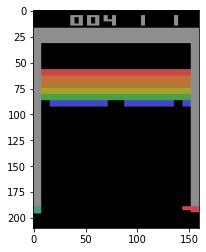

In [ ]:
plt.imshow(next)

In [ ]:
mainNet = DQN()

In [ ]:
torch.save(mainNet.state_dict(), 'ali')


In [ ]:
mainNet.load_state_dict(torch.load('ali'))


<All keys matched successfully>

In [ ]:
mainNet.load_state_dict(torch.load('best.dat'))


OSError: ignored